# biosc - diagnostics: get inference data and plots

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import bambi as bmb
import xarray as xr
import biosc
import biosc.preprocessing

from pymc import HalfCauchy, Model, Normal, sample


In [2]:
plt.rcParams.update({'font.size': 14, 'axes.linewidth': 1, 'axes.edgecolor': 'k'})
plt.rcParams['font.family'] = 'serif'

In [3]:
serif_fonts = plt.rcParams['font.serif']
serif_fonts[0]

'DejaVu Serif'

#Example: configure and compile the model
priors_uninf = {
    'age': {'dist': 'uniform', 'lower': 70, 'upper': 150},
    'distance': {'dist': 'normal', 'mu': 135, 'sigma': 20}
}

model_uninf = BayesianModel(parallax_data, m_data, Li_data)
model_uninf.compile(priors_uninf, POPho=False, POLi=True)

model_uninf.sample(chains=4)

model_uninf.sample_posterior_predictive()

#Example: Plot posterior distributions
model_uninf.plot_trace(var_names=['age', 'distance'])

#Example: Plot posterior predictive checks
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
az.plot_ppc(model_uninf.idata, var_names = 'parallax', ax = axs[0])
az.plot_ppc(model_uninf.idata, var_names = 'flux', ax = axs[1])
az.plot_ppc(model_uninf.idata, var_names = 'Li', ax = axs[2])
plt.show()

#Example: Plot QQ for parallax
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_ylabel('observed parallax [mas]')
ax.set_xlabel('parallax [mas]')
model_uninf.plot_QQ('parallax', fig, ax)
plt.show()

#Example: Plot QQ for Li
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_ylabel('observed Li')
ax.set_xlabel('Li')
model_uninf.plot_QQ('Li', fig, ax)
plt.show()

for the mean values of Li... each chain and each draw

### Inference for biosc & DANCe UCDs in Li abundance

In [204]:
prep = Preprocessing('test_ALi.csv', sortPho=False)
parallax_data = prep.get_parallax()
Li_data = prep.get_Li()
m_data = prep.get_magnitude(fillna='max')

In [205]:
Li_data

,data,sigma,idx
source_id,,,
69819404977607168,2.754,0.038,True
64930495244783616,2.743,0.039,True
65225611037551360,3.035,0.030,True
64952829074688896,2.887,0.035,True
64808204638390912,2.483,0.067,True
...,...,...,...
65194274954079104,2.183,0.498,True
66498158310444288,3.292,0.216,True
64001339197473408,0.353,0.100,True


/tmp/ipykernel_3032/4178662609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Li_data['idx'].iloc[:-14] = False
/tmp/ipykernel_3032/4178662609.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Li_data['data'].iloc[:-14] = None
/tmp/ipykernel_3032/4178662609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Li_data['data'].iloc[:-14] = None
/tmp/ipykernel_3032/4178662609.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Li_data['sigma'].iloc[:-14] = None
/tmp/ipykernel_3032/4178662609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Li_data['sigma'].iloc[:-14] = None

In [206]:
Li_data['idx'].iloc[:-14] = False
Li_data['data'].iloc[:-14] = None
Li_data['sigma'].iloc[:-14] = None

In [207]:
Li_data
Li_data_obs = Li_data

In [208]:
from biosc.bhm import BayesianModel

In [209]:
priors = {
    'Age [Myr]': {'dist': 'normal', 'mu': 120, 'sigma': 20},
    'Distance [pc]': {'dist': 'normal', 'mu': 135, 'sigma': 20}
}


model = BayesianModel(parallax_data, m_data, Li_data)

In [212]:
#model.compile(priors, POPho=False, POLi=True)
model.compile(priors, POPho=False, POLi=False)

In [213]:
model.sample(draws=500, chains=4)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Mass [$M_{\odot}$], Age [Myr], Distance [pc], σ_F, σ_Li]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 18670 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [214]:
model.sample_posterior_predictive()

Sampling: [A(Li) [dex], flux [erg s$^{-1}$ cm$^{-2}$], parallax [mas]]


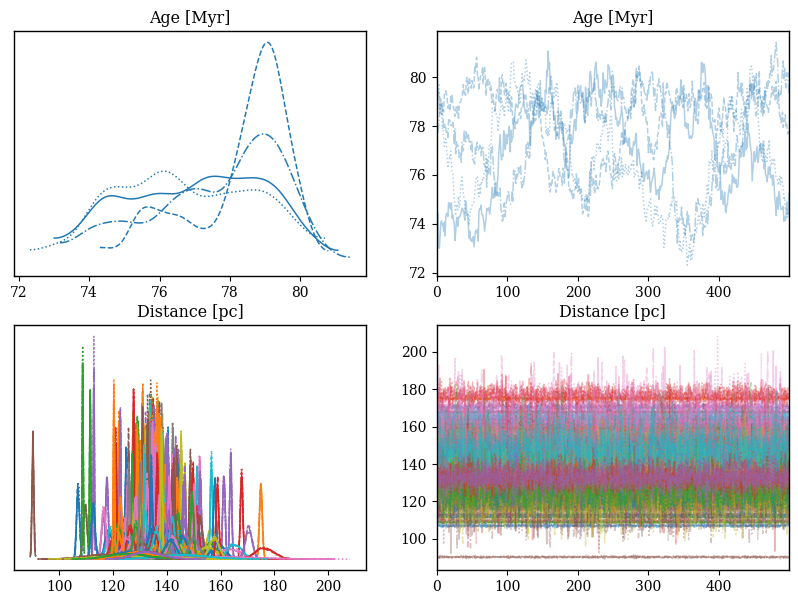

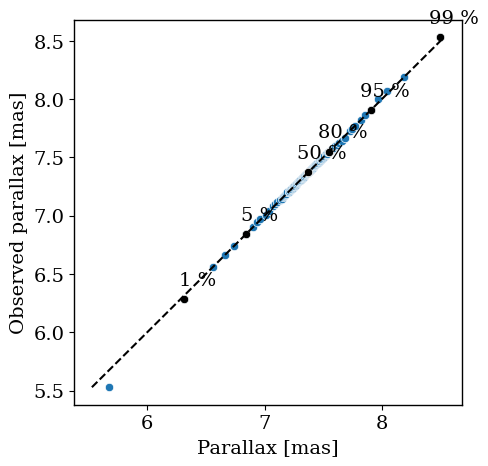

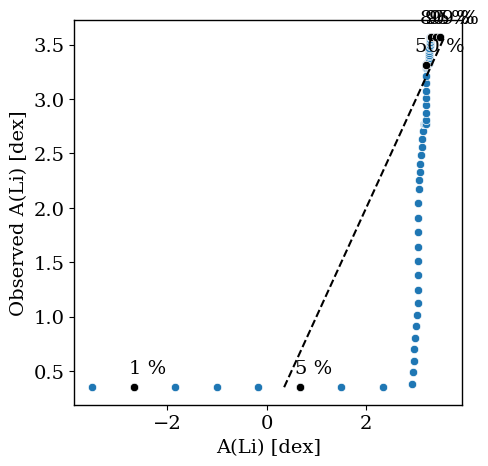

In [215]:
model.plot_trace(var_names=['Age [Myr]', 'Distance [pc]'])

#Plot QQ for parallax
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_ylabel('Observed parallax [mas]')
ax.set_xlabel('Parallax [mas]')
model.plot_QQ('parallax [mas]', fig, ax)
plt.show()

#Plot QQ for Li
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_ylabel('Observed A(Li) [dex]')
ax.set_xlabel('A(Li) [dex]')
model.plot_QQ('A(Li) [dex]', fig, ax)
plt.show()

<Axes: title={'center': 'Age [Myr]'}>

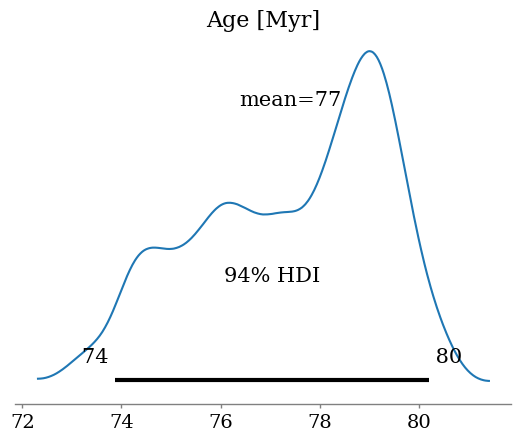

In [217]:
az.plot_posterior(model.trace, var_names=['Age [Myr]'])

In [220]:
model.save('output_test_oUCDs_noPO.nc')

['g', 'bp', 'rp', 'Jmag', 'Hmag', 'Kmag', 'gmag', 'rmag', 'imag', 'ymag', 'zmag']

In [106]:
path = '/pcdisk/dalen/lgonzalez/RepGit/Biosc_work/biosc/data/BT-Settl_all_Myr_Gaia+2MASS+PanSTARRS.csv'

BTSettl_Li = pd.read_csv(path)
BTSettl_Li

,age_Myr,t(Gyr),M/Ms,Teff(K),L/Ls,lg(g),R(Gcm),D,Li,G,G_BP,G_RP,J,H,K,g_p1,r_p1,i_p1,y_p1,z_p1
0,1.0,0.001,0.010,2345.0,-2.70,3.57,18.99,1.00,1.0000,14.055,17.784799,12.4668,9.328,8.770,8.353,17.937,17.095,13.757,12.125,11.009
1,1.0,0.001,0.015,2504.0,-2.42,3.58,22.90,1.00,1.0000,13.015,16.269800,11.4758,8.667,8.135,7.751,16.291,15.787,12.540,11.155,10.214
2,1.0,0.001,0.020,2598.0,-2.25,3.59,26.11,1.00,1.0000,12.381,15.366800,10.8708,8.238,7.710,7.347,15.366,14.935,11.827,10.566,9.722
3,1.0,0.001,0.030,2710.0,-1.98,3.57,32.78,1.00,1.0000,11.507,14.182800,10.0358,7.582,7.054,6.720,14.194,13.747,10.885,9.754,9.006
4,1.0,0.001,0.040,2779.0,-1.81,3.57,37.62,0.99,1.0000,10.990,13.496800,9.5408,7.188,6.652,6.338,13.512,13.061,10.339,9.275,8.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,10000.0,10.000,0.500,3689.0,-1.43,4.78,33.05,0.00,0.0000,8.937,9.932800,7.9128,6.589,5.944,5.721,10.162,9.297,8.342,7.936,7.713
834,10000.0,10.000,0.600,4013.0,-1.12,4.70,39.92,0.00,0.0000,7.960,8.747800,7.0678,5.926,5.237,5.059,9.010,8.100,7.463,7.188,7.015
835,10000.0,10.000,0.700,4493.0,-0.79,4.63,46.43,0.00,0.0000,6.900,7.487800,6.1598,5.244,4.614,4.490,7.754,6.870,6.537,6.392,6.271
836,10000.0,10.000,0.800,5002.0,-0.47,4.55,54.44,0.00,0.0000,5.925,6.365800,5.3108,4.580,4.098,4.000,6.529,5.885,5.675,5.594,5.525


### Inference module to plot inference data from biosc & DANCe UCDs in Li abundance (filter data; TOPCAT)

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import arviz as az
from netCDF4 import Dataset as NetCDFFile
from scipy.stats import gaussian_kde

from biosc.preprocessing import Preprocessing
from biosc.bhm import BayesianModel

In [25]:
def process_idata(data_file, priors, file, path_data, path_models, L, ages, colormap, plot_type='all', band=None, save=None, ifile=None, pfile=None):
    '''
    Inputs:
    - file: File input.
    - path_data: Path to Pleiades data file.
    - path_models: Path to isochrones model data file.
    - L: Some parameter L.
    - ages: List of ages.
    - colormap: Colormap name.
    - plot_type: Type of plot to generate. Options are 'all' for subplots of all photometric bands or 'unique' for a single band plot.
    - band: Photometric band for 'unique' plot type.
    '''
    directory = os.getcwd()
    folder = 'idata'
    path_folder = os.path.join(directory, folder)
    path_file = os.path.join(path_folder, file)

    directory = os.path.normpath(directory)
    path_folder = os.path.normpath(path_folder)
    path_file = os.path.normpath(path_file)

    print(path_file)
    
    data_test = NetCDFFile(path_file, 'r')

    posterior_group = data_test.groups['posterior']

    Li_data = posterior_group.variables['Li*'][:]

    Li_samples = posterior_group.variables['Li*'][:]

    Li_samples_reshaped = Li_samples.reshape(-1, L)

    i_mean = np.mean(Li_samples_reshaped, axis=0)

    Li_mean_simple = np.mean(Li_samples_reshaped, axis=0).data

    Li_summary = pm.summary(posterior_group.variables['Li*'][:])

    M_data = posterior_group.variables['M*'][:]

    G_data = M_data[..., 0]
    BP_data = M_data[..., 1]
    RP_data = M_data[..., 2]
    J_data = M_data[..., 3]
    H_data = M_data[..., 4]
    K_data = M_data[..., 5]
    g_data = M_data[..., 6]
    r_data = M_data[..., 7]
    i_data = M_data[..., 8]
    y_data = M_data[..., 9]
    z_data = M_data[..., 10]

    J_samples = J_data.reshape(-1, L)
    J_samples_mean = np.mean(J_samples, axis=0)
    K_samples = K_data.reshape(-1, L)
    K_samples_mean = np.mean(K_samples, axis=0)
    G_samples = G_data.reshape(-1, L)
    G_samples_mean = np.mean(G_samples, axis=0)
    BP_samples = BP_data.reshape(-1, L)
    BP_samples_mean = np.mean(BP_samples, axis=0)
    RP_samples = RP_data.reshape(-1, L)
    RP_samples_mean = np.mean(RP_samples, axis=0)
    H_samples = H_data.reshape(-1, L)
    H_samples_mean = np.mean(H_samples, axis=0)
    g_samples = g_data.reshape(-1, L)
    g_samples_mean = np.mean(g_samples, axis=0)
    r_samples = r_data.reshape(-1, L)
    r_samples_mean = np.mean(r_samples, axis=0)
    i_samples = i_data.reshape(-1, L)
    i_samples_mean = np.mean(i_samples, axis=0)
    y_samples = y_data.reshape(-1, L)
    y_samples_mean = np.mean(y_samples, axis=0)
    z_samples = z_data.reshape(-1, L)
    z_samples_mean = np.mean(z_samples, axis=0)
    
    # prepare photometric bands
    mags = ['G', 'BP', 'RP', 'J', 'H', 'K', 'g', 'r', 'i', 'y', 'z']
    bands = ['BP', 'RP', 'J', 'H', 'K', 'r', 'i', 'y', 'z']
    bands_e = ['bp', 'rp', 'Jmag', 'Hmag', 'Kmag', 'rmag', 'imag', 'ymag', 'zmag']

    
    # load Pleiades and model
    Pleiades_Li = load_pleiades_data(path_data)
    model_Li_isochrones = load_model_isochrones(path_models)
    
    
    plt.rcParams.update({'font.size': 14})
    
    # bayesian inference for data
    data_model, prior_sample = bayesian_model(data_file, priors, save, ifile, pfile)
    
    # load prior sample data
    dataframe_prior_sample = prior_sample.prior['M*'].to_dataframe()
    
    data_model_pd = pd.DataFrame(data_model['m_data']['data'])
    
    data_model_pd.rename(columns={'g': 'G', 'bp': 'BP', 'rp': 'RP', 'Jmag': 'J', 'Hmag': 'H', 'Kmag': 'K',
                                'gmag': 'g', 'rmag': 'r', 'imag': 'i', 'ymag': 'y', 'zmag': 'z'}, inplace=True)
    
    data_model_pd['Parallax'] = data_model['parallax_data']['data']
    data_model_pd['Li_data'] = data_model['Li_data']['data']
    
    items = data_model.items()
    for key, value in items:
        print(f'Key {key}')
    
    # get abs magnitudes and distance corrections
    Pleiades_Li, data_model_pd = calculate_absolute_magnitudes(Pleiades_Li, data_model_pd, mags, bands)
    
    # Li plot
    fig, ax2 = plt.subplots(1, 1, figsize=(10, 8))
    plot_additional_subplot(ax2, Pleiades_Li, data_model_pd, model_Li_isochrones, G_samples_mean, J_samples_mean, Li_mean_simple, ages, colormap)
    ax2.legend(loc='lower right')
    plt.show()
    
    # plot subplots or single band plot
    if plot_type == 'all':
        plt.rcParams.update({'font.size': 24})  # update font size for subplots
        fig, axs = plt.subplots(3, 3, figsize=(24, 18))
        plot_subplots(axs, bands, bands_e, Pleiades_Li, data_model_pd, model_Li_isochrones, ages, colormap,
                      G_samples_mean, BP_samples_mean, RP_samples_mean, J_samples_mean, H_samples_mean,
                      K_samples_mean, g_samples_mean, r_samples_mean, i_samples_mean, y_samples_mean, z_samples_mean)
        plt.tight_layout()
        plt.legend(loc='upper right', fontsize=24, bbox_to_anchor=(1.5, 1.5))
        plt.show()
    elif plot_type == 'unique':
        plt.rcParams.update({'font.size': 14})  # update font size for individual plot
        if band is None or band not in mags:
            print("Please provide a valid photometric band.")
            return None
        else:
            fig, ax = plt.subplots(figsize=(10, 8))
            plot_single_band(ax, Pleiades_Li, data_model_pd, model_Li_isochrones, ages, colormap, band)
            plt.legend(loc='upper right', fontsize=12)
            plt.show()
    else:
        plt.rcParams.update({'font.size': 14})  # update font size for Li plot
        print("Invalid plot type. Please choose 'all' or 'unique'.")
        return None

    return axs, ax2

def load_pleiades_data(path_data):
    '''
    Loads Pleiades data from a CSV file.
    '''
    Pleiades_Li = pd.read_csv(path_data)
    Pleiades_Li['e_bp'] = Pleiades_Li['bp_error']
    Pleiades_Li['e_rp'] = Pleiades_Li['rp_error']
    
    #rename bands
    Pleiades_Li.rename(columns={'g': 'G', 'bp': 'BP', 'rp': 'RP', 'Jmag': 'J', 'Hmag': 'H', 'Kmag': 'K',
                                'gmag': 'g', 'rmag': 'r', 'imag': 'i', 'ymag': 'y', 'zmag': 'z'}, inplace=True)
    
    return Pleiades_Li

def load_model_isochrones(path_models):
    '''
    Loads model isochrones data from a CSV file.
    '''
    model = pd.read_csv(path_models)
    
    model.rename(columns={'age_Myr': 'age_Gyr',
                          'Teff(K)': 'Teff',
                          'G_RP': 'RP',
                          'G_BP': 'BP',
                          'r_p1': 'r',
                          'i_p1': 'i',
                          'y_p1': 'y',
                          'z_p1': 'z'}, inplace=True)
    
    model['age_Gyr'] *= 0.001
    model['A(Li)'] = np.log10(model['Li']) + 3.3
    
    # Create a dictionary to store dataframes for each isochrone
    model_Li_isochrones = {}

    # Loop over each row in the model dataframe
    for index, row in model.iterrows():
        # Get the value of age_Gyr from the current row
        age_Gyr = row['age_Gyr']

        # Check if the value of age_Gyr already exists as a key in the dictionary
        if age_Gyr not in model_Li_isochrones:
            # If it doesn't exist, create a new entry in the dictionary with the value of age_Gyr as the key
            model_Li_isochrones[age_Gyr] = []

        # Add the current row to the corresponding value of age_Gyr in the dictionary
        model_Li_isochrones[age_Gyr].append(row)

    # Convert each list of rows into a dataframe and replace the list in the dictionary
    for age_Gyr, rows in model_Li_isochrones.items():
        model_Li_isochrones[age_Gyr] = pd.DataFrame(rows)
    
    return model_Li_isochrones

def calculate_absolute_magnitudes(Pleiades_Li, data_model_pd, mags, bands):
    '''
    Calculates absolute magnitudes and distance corrections.
    '''
    distance = 1 / (data_model_pd['Parallax'] * 1e-3)
    distance_mod = 5 * np.log10(distance) - 5 
    Mags = []
    for i, mag in enumerate(mags):
        Pleiades_Li[mag+'_abs'] = Pleiades_Li[mag] - distance_mod
        data_model_pd[mag+'_abs'] = data_model_pd[mag] - distance_mod
        Mags.append(mag+'_abs')
    return Pleiades_Li, data_model_pd

def plot_subplots(axs, bands, bands_e, Pleiades_Li, data_model_pd, model_Li_isochrones, ages, colormap, 
                  G_samples_mean, BP_samples_mean, RP_samples_mean, J_samples_mean, H_samples_mean, 
                  K_samples_mean, g_samples_mean, r_samples_mean, i_samples_mean, y_samples_mean, z_samples_mean):
    '''
    Plots subplots for each photometric band.
    '''
    
    colors = get_colors(ages, colormap)
    for i, band in enumerate(bands):
        diff_obs = Pleiades_Li['G_abs'] - Pleiades_Li[band+'_abs']
        diff_model = data_model_pd['G_abs'] - data_model_pd[band+'_abs']
        ax = axs[i // 3, i % 3]
        plot_observation(ax, diff_obs, Pleiades_Li, band, bands_e[i])
        plot_model(ax, diff_model, data_model_pd, band, model_Li_isochrones, ages, colors,
                   G_samples_mean, BP_samples_mean, RP_samples_mean, J_samples_mean, H_samples_mean, 
                   K_samples_mean, g_samples_mean, r_samples_mean, i_samples_mean, y_samples_mean, z_samples_mean)
        ax.set_xlabel(f'G-{band} [mag]')
        ax.set_ylabel(f'{band} [mag]')
        ax.invert_yaxis()
        if band in ['BP', 'r']:
            ax.invert_xaxis()
        

def plot_model(ax, diff_model, data_model_pd, band, model_Li_isochrones, ages, colors,
               G_samples_mean, BP_samples_mean, RP_samples_mean, J_samples_mean, H_samples_mean, 
               K_samples_mean, g_samples_mean, r_samples_mean, i_samples_mean, y_samples_mean, z_samples_mean):
    ax.scatter(diff_model, data_model_pd[band+'_abs'], s=5, label='Prior')
    sample_mean_band = locals()[f"{band}_samples_mean"]
    ax.scatter(G_samples_mean - sample_mean_band, sample_mean_band, s=5, label='Post', color='red')
    for age, color in zip(ages, colors):
        ax.plot(model_Li_isochrones[age]['G'] - model_Li_isochrones[age][band], 
                model_Li_isochrones[age][band], linewidth=1, label=f'{age} Gyr', color=color)

def get_colors(ages, colormap):
    '''
    Generates colors based on colormap and ages.
    '''
    min_age = min(ages)
    max_age = max(ages)
    num_ages = len(ages)
    
    norm = plt.Normalize(min_age, max_age)
    colormap_function = cm.get_cmap(colormap)
    
    #linespaced points
    age_points = np.linspace(min_age, max_age, num_ages)
    
    
    return [colormap_function(norm(age)) for age in age_points]

def plot_observation(ax, diff_obs, Pleiades_Li, band, band_error):
    ax.errorbar(diff_obs, Pleiades_Li[band+'_abs'], yerr=Pleiades_Li['e_'+band_error], fmt='.', capsize=0, linewidth=1, capthick=1, label='Obs', color='orange', zorder=1)


def plot_additional_subplot(ax2, Pleiades_Li, data_model_pd, model_Li_isochrones, G_samples_mean, J_samples_mean, Li_mean_simple, ages, colormap):
    colors = get_colors(ages, colormap)
    ax2.errorbar(Pleiades_Li['G'] - Pleiades_Li['J'], Pleiades_Li['ALi'], yerr=Pleiades_Li['e_ALi'], fmt='.', capsize=0, linewidth=1, capthick=1, label='Obs', color='orange', zorder=1)
    ax2.scatter(data_model_pd['G'] - data_model_pd['J'], data_model_pd['Li_data'], s=5, label='Prior', zorder=2)
    for age, color in zip(ages, colors):
        ax2.plot(model_Li_isochrones[age]['G'] - model_Li_isochrones[age]['J'], 
                model_Li_isochrones[age]['A(Li)'], linewidth=1, label=f'{age} Gyr', color=color)
    ax2.set_xlabel('G-J [mag]')
    ax2.set_ylabel('A(Li) [dex]')
    ax2.scatter(G_samples_mean - J_samples_mean, Li_mean_simple, s=5, label='Post', color='red', zorder=3)
    

def plot_single_band(ax, Pleiades_Li, data_model_pd, model_Li_isochrones, ages, colormap, band):
    colors = get_colors(ages, colormap)
    diff_obs = Pleiades_Li['G'] - Pleiades_Li[band]
    diff_model = data_model_pd['G_abs'] - data_model_pd[band+'_abs']
    plot_observation(ax, diff_obs, Pleiades_Li, band, band_e[bands.index(band)])
    plot_model(ax, diff_model, data_model_pd, band, model_Li_isochrones, ages, colors)
    ax.set_xlabel(f'G-{band} [mag]')
    ax.set_ylabel(f'{band} [mag]')
    ax.invert_yaxis()
    if band in ['BP', 'r']:
        ax.invert_xaxis()
        
def bayesian_model(data_file, priors, save, ifile, pfile):
    prep = Preprocessing(data_file, sortPho=False)
    parallax_data = prep.get_parallax()
    Li_data = prep.get_Li()
    m_data = prep.get_magnitude(fillna='max')

    model = BayesianModel(parallax_data, m_data, Li_data)
    model.compile(priors, POPho=False, POLi=False)
    model.sample(draws=2000, chains=4)
    model.sample_posterior_predictive()
    
    prior_sample = model.sample_prior_predictive(samples = 500, return_inferencedata = True)
    
    if save == True:
        model.save('output_test_oUCDs_noPO.nc')
        prior_sample.to_netcdf('prior_sample_only_UCDs_noPO.nc')
    else:
        pass
    
    model.plot_trace(var_names=['Age [Myr]', 'Distance [pc]'])
    
    data_model = model.generate_data(mode = 'dist')
    
    fig, axs = plt.subplots(1, 3, figsize=(14, 5))
    az.plot_ppc(model.idata, var_names = 'parallax [mas]', ax = axs[0])
    az.plot_ppc(model.idata, var_names = r'flux [erg s$^{-1}$ cm$^{-2}$]', ax = axs[1])
    az.plot_ppc(model.idata, var_names = 'A(Li) [dex]', ax = axs[2])
    plt.show()

    #Plot QQ for parallax
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_ylabel('Observed parallax [mas]')
    ax.set_xlabel('Parallax [mas]')
    model.plot_QQ('parallax [mas]', fig, ax)
    plt.show()

    #Plot QQ for Li
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_ylabel('Observed A(Li) [dex]')
    ax.set_xlabel('A(Li) [dex]')
    model.plot_QQ('A(Li) [dex]', fig, ax)
    plt.show()

    az.plot_posterior(model.trace, var_names=['Age [Myr]'])
    return data_model, prior_sample

/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/idata/output_test_UCDs_low_clean_only_good_uninf.nc


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Mass [$M_{\odot}$], Age [Myr], Distance [pc], σ_F, σ_Li]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 252 seconds.
Sampling: [A(Li) [dex], flux [erg s$^{-1}$ cm$^{-2}$], parallax [mas]]


Sampling: [A(Li) [dex], Age [Myr], Distance [pc], Mass [$M_{\odot}$], flux [erg s$^{-1}$ cm$^{-2}$], parallax [mas], σ_F, σ_Li]


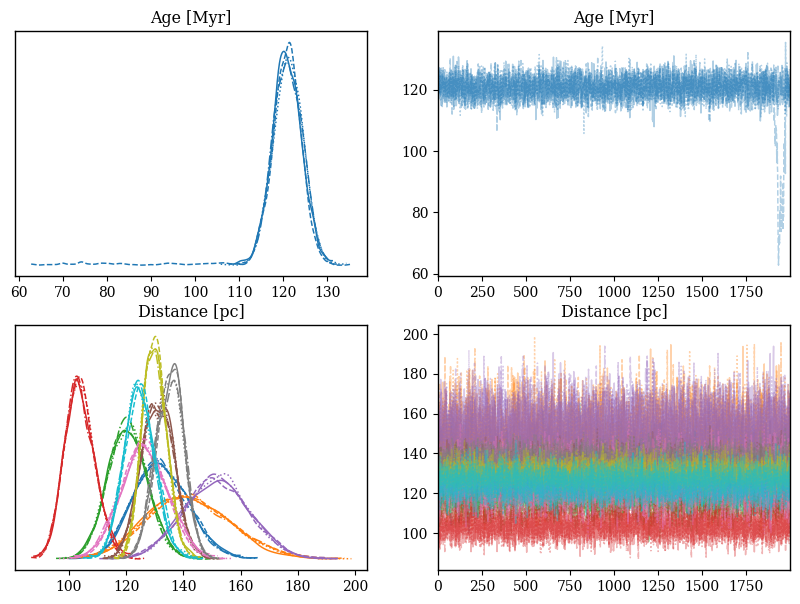

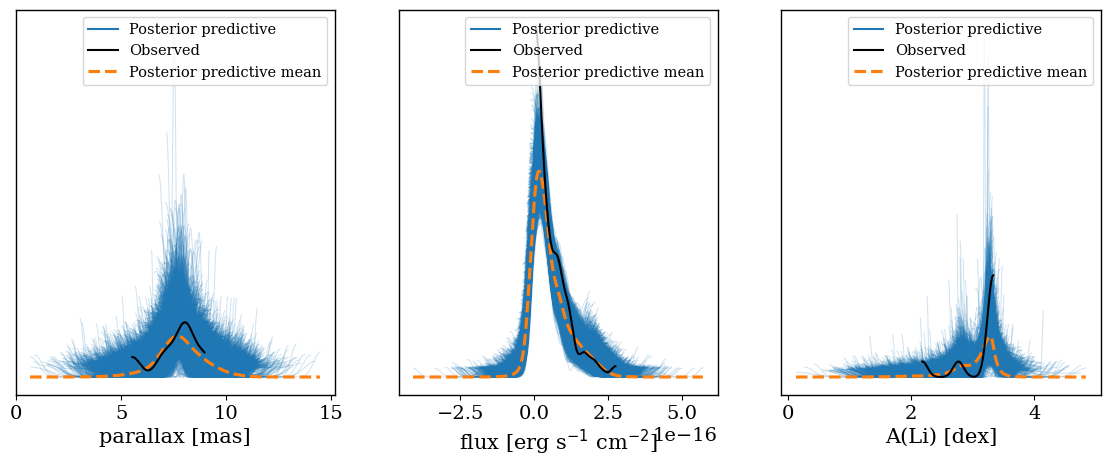

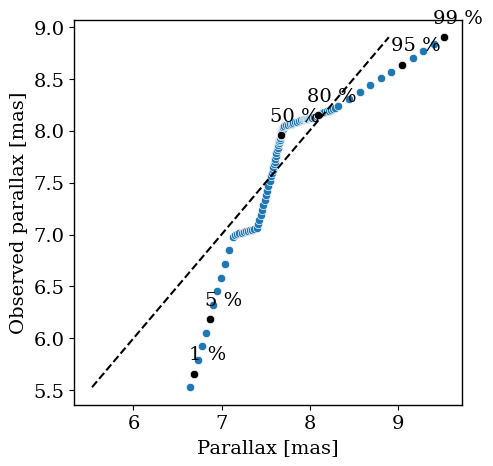

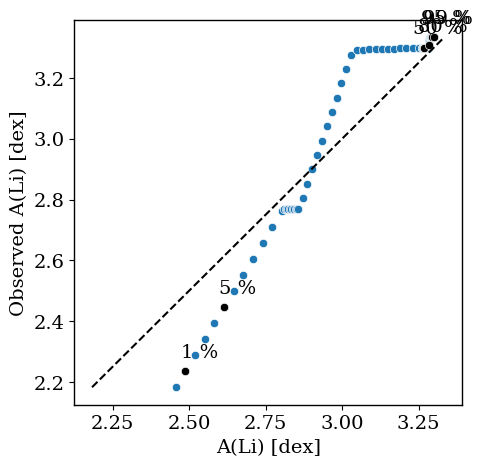

Key m_data
Key parallax_data
Key Li_data
Key Age [Myr]


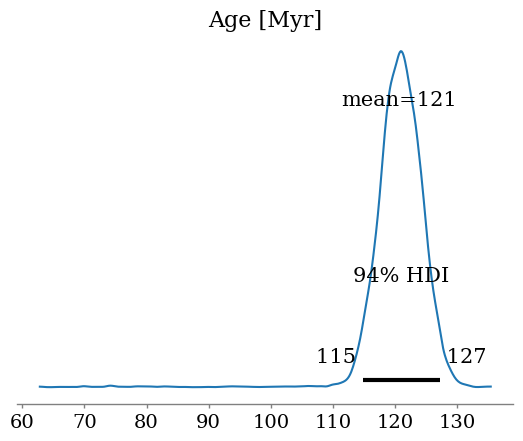

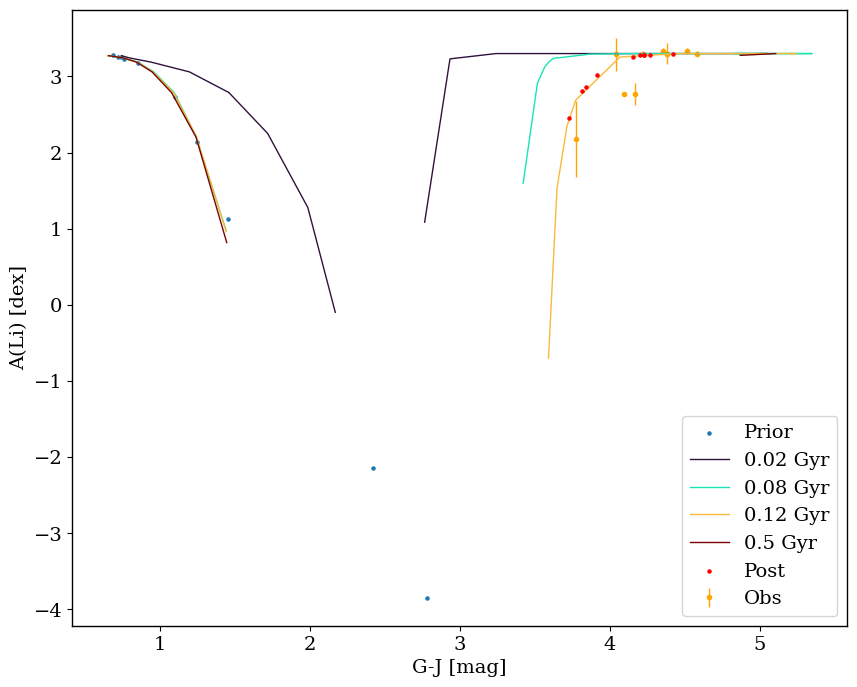

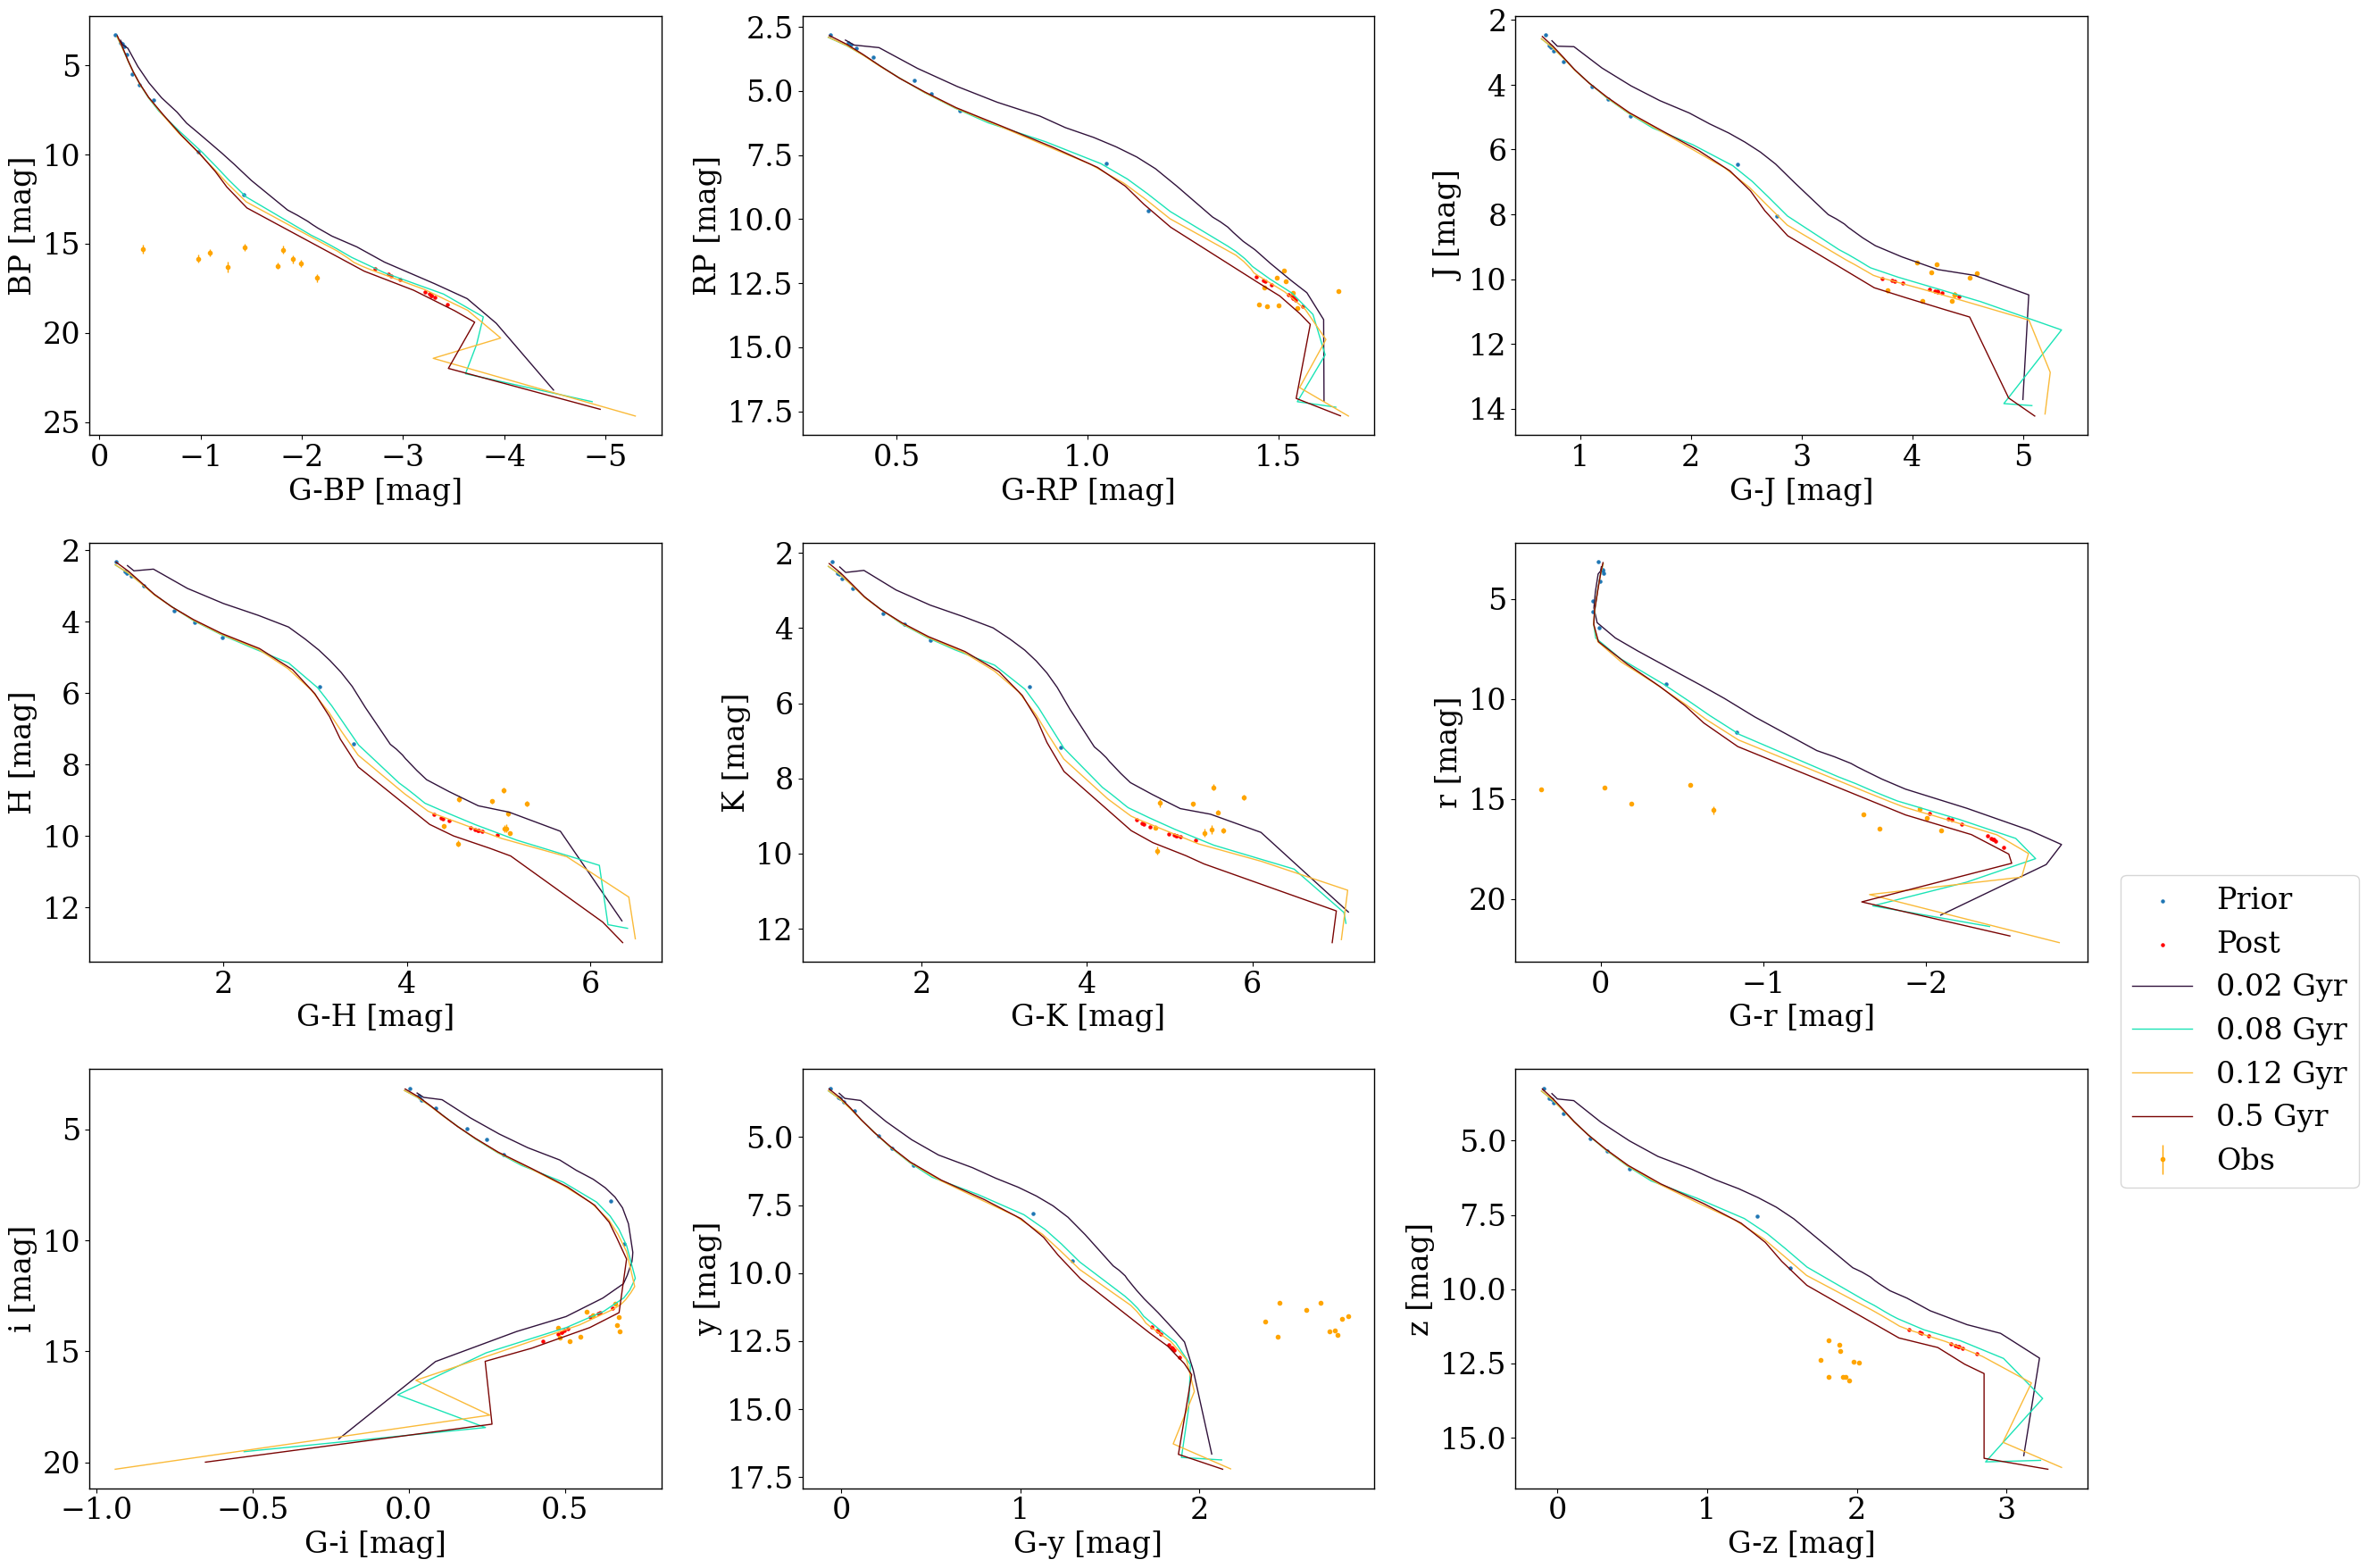

(array([[<Axes: xlabel='G-BP [mag]', ylabel='BP [mag]'>,
         <Axes: xlabel='G-RP [mag]', ylabel='RP [mag]'>,
         <Axes: xlabel='G-J [mag]', ylabel='J [mag]'>],
        [<Axes: xlabel='G-H [mag]', ylabel='H [mag]'>,
         <Axes: xlabel='G-K [mag]', ylabel='K [mag]'>,
         <Axes: xlabel='G-r [mag]', ylabel='r [mag]'>],
        [<Axes: xlabel='G-i [mag]', ylabel='i [mag]'>,
         <Axes: xlabel='G-y [mag]', ylabel='y [mag]'>,
         <Axes: xlabel='G-z [mag]', ylabel='z [mag]'>]], dtype=object),
 <Axes: xlabel='G-J [mag]', ylabel='A(Li) [dex]'>)

In [26]:
data_file = 'test_ALi_low_clean_only_good.csv'

file = 'output_test_UCDs_low_clean_only_good_uninf.nc'

path_data = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/test_ALi_low_clean_only_good.csv'

path_models = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/BT-Settl_all_Myr_Gaia+2MASS+PanSTARRS.csv'

L = 10

priors = {
    'Age [Myr]': {'dist': 'uniform', 'lower': 60, 'upper': 150},
    'Distance [pc]': {'dist': 'normal', 'mu': 135, 'sigma': 20}
}


process_idata(data_file, priors, file, path_data, path_models, L, ages=[0.02, 0.08, 0.12, 0.5], colormap='turbo', plot_type='all')

In [23]:
import sys
sys.path.append('/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/')

/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/idata/output_test_UCDs_low_clean_only_good_uninf.nc


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Mass [$M_{\odot}$], Age [Myr], Distance [pc], σ_F, σ_Li]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 260 seconds.
Sampling: [A(Li) [dex], flux [erg s$^{-1}$ cm$^{-2}$], parallax [mas]]


Sampling: [A(Li) [dex], Age [Myr], Distance [pc], Mass [$M_{\odot}$], flux [erg s$^{-1}$ cm$^{-2}$], parallax [mas], σ_F, σ_Li]


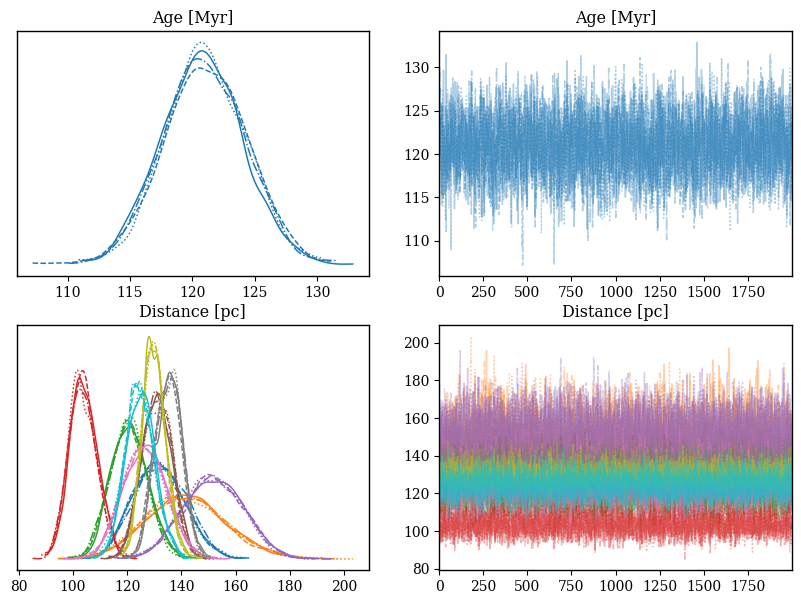

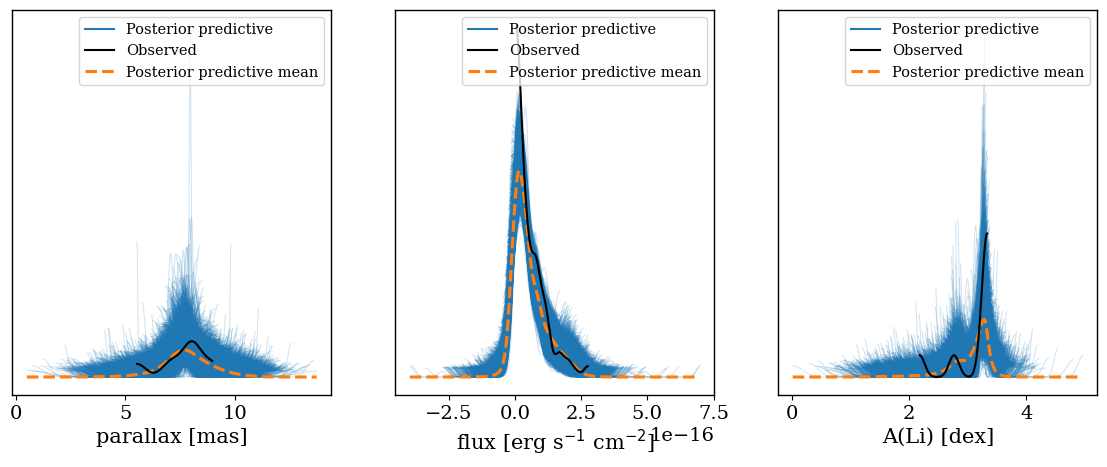

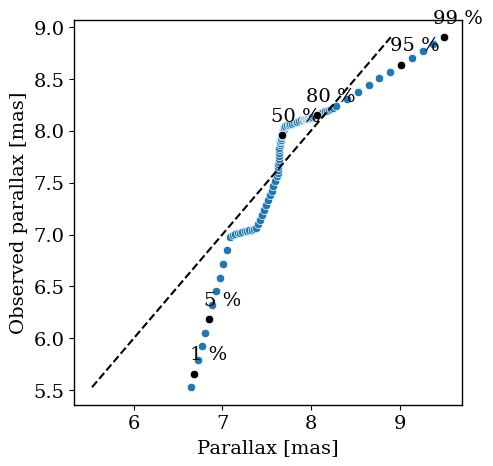

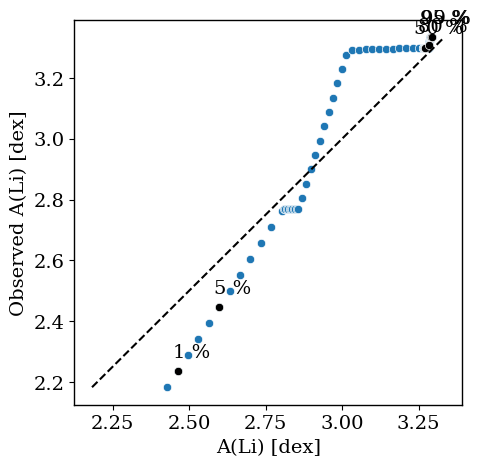

Key m_data
Key parallax_data
Key Li_data
Key Age [Myr]


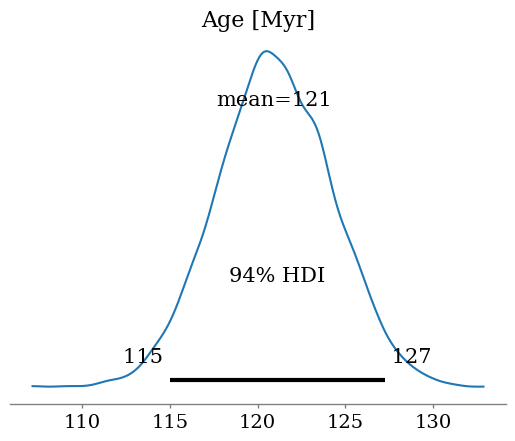

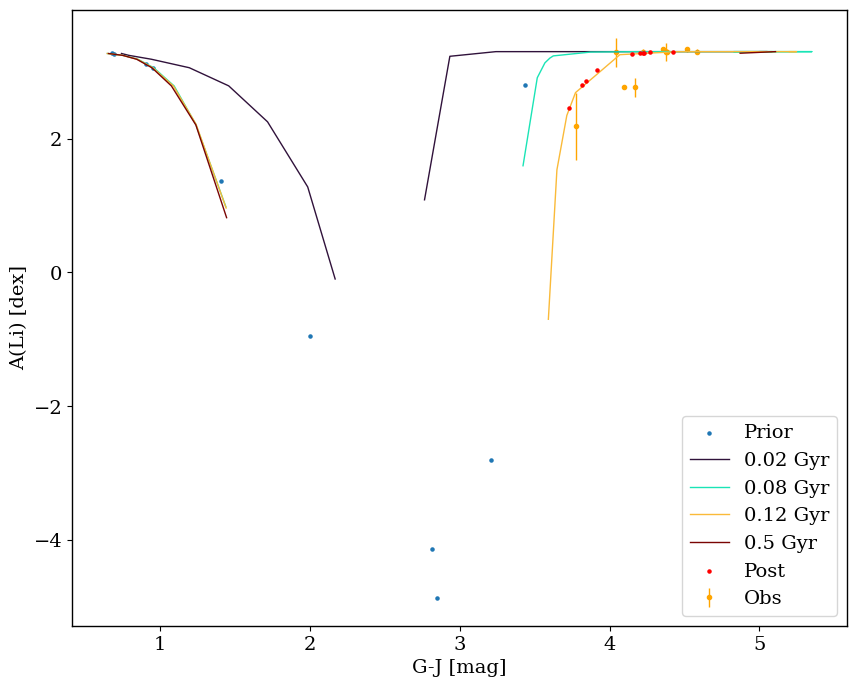

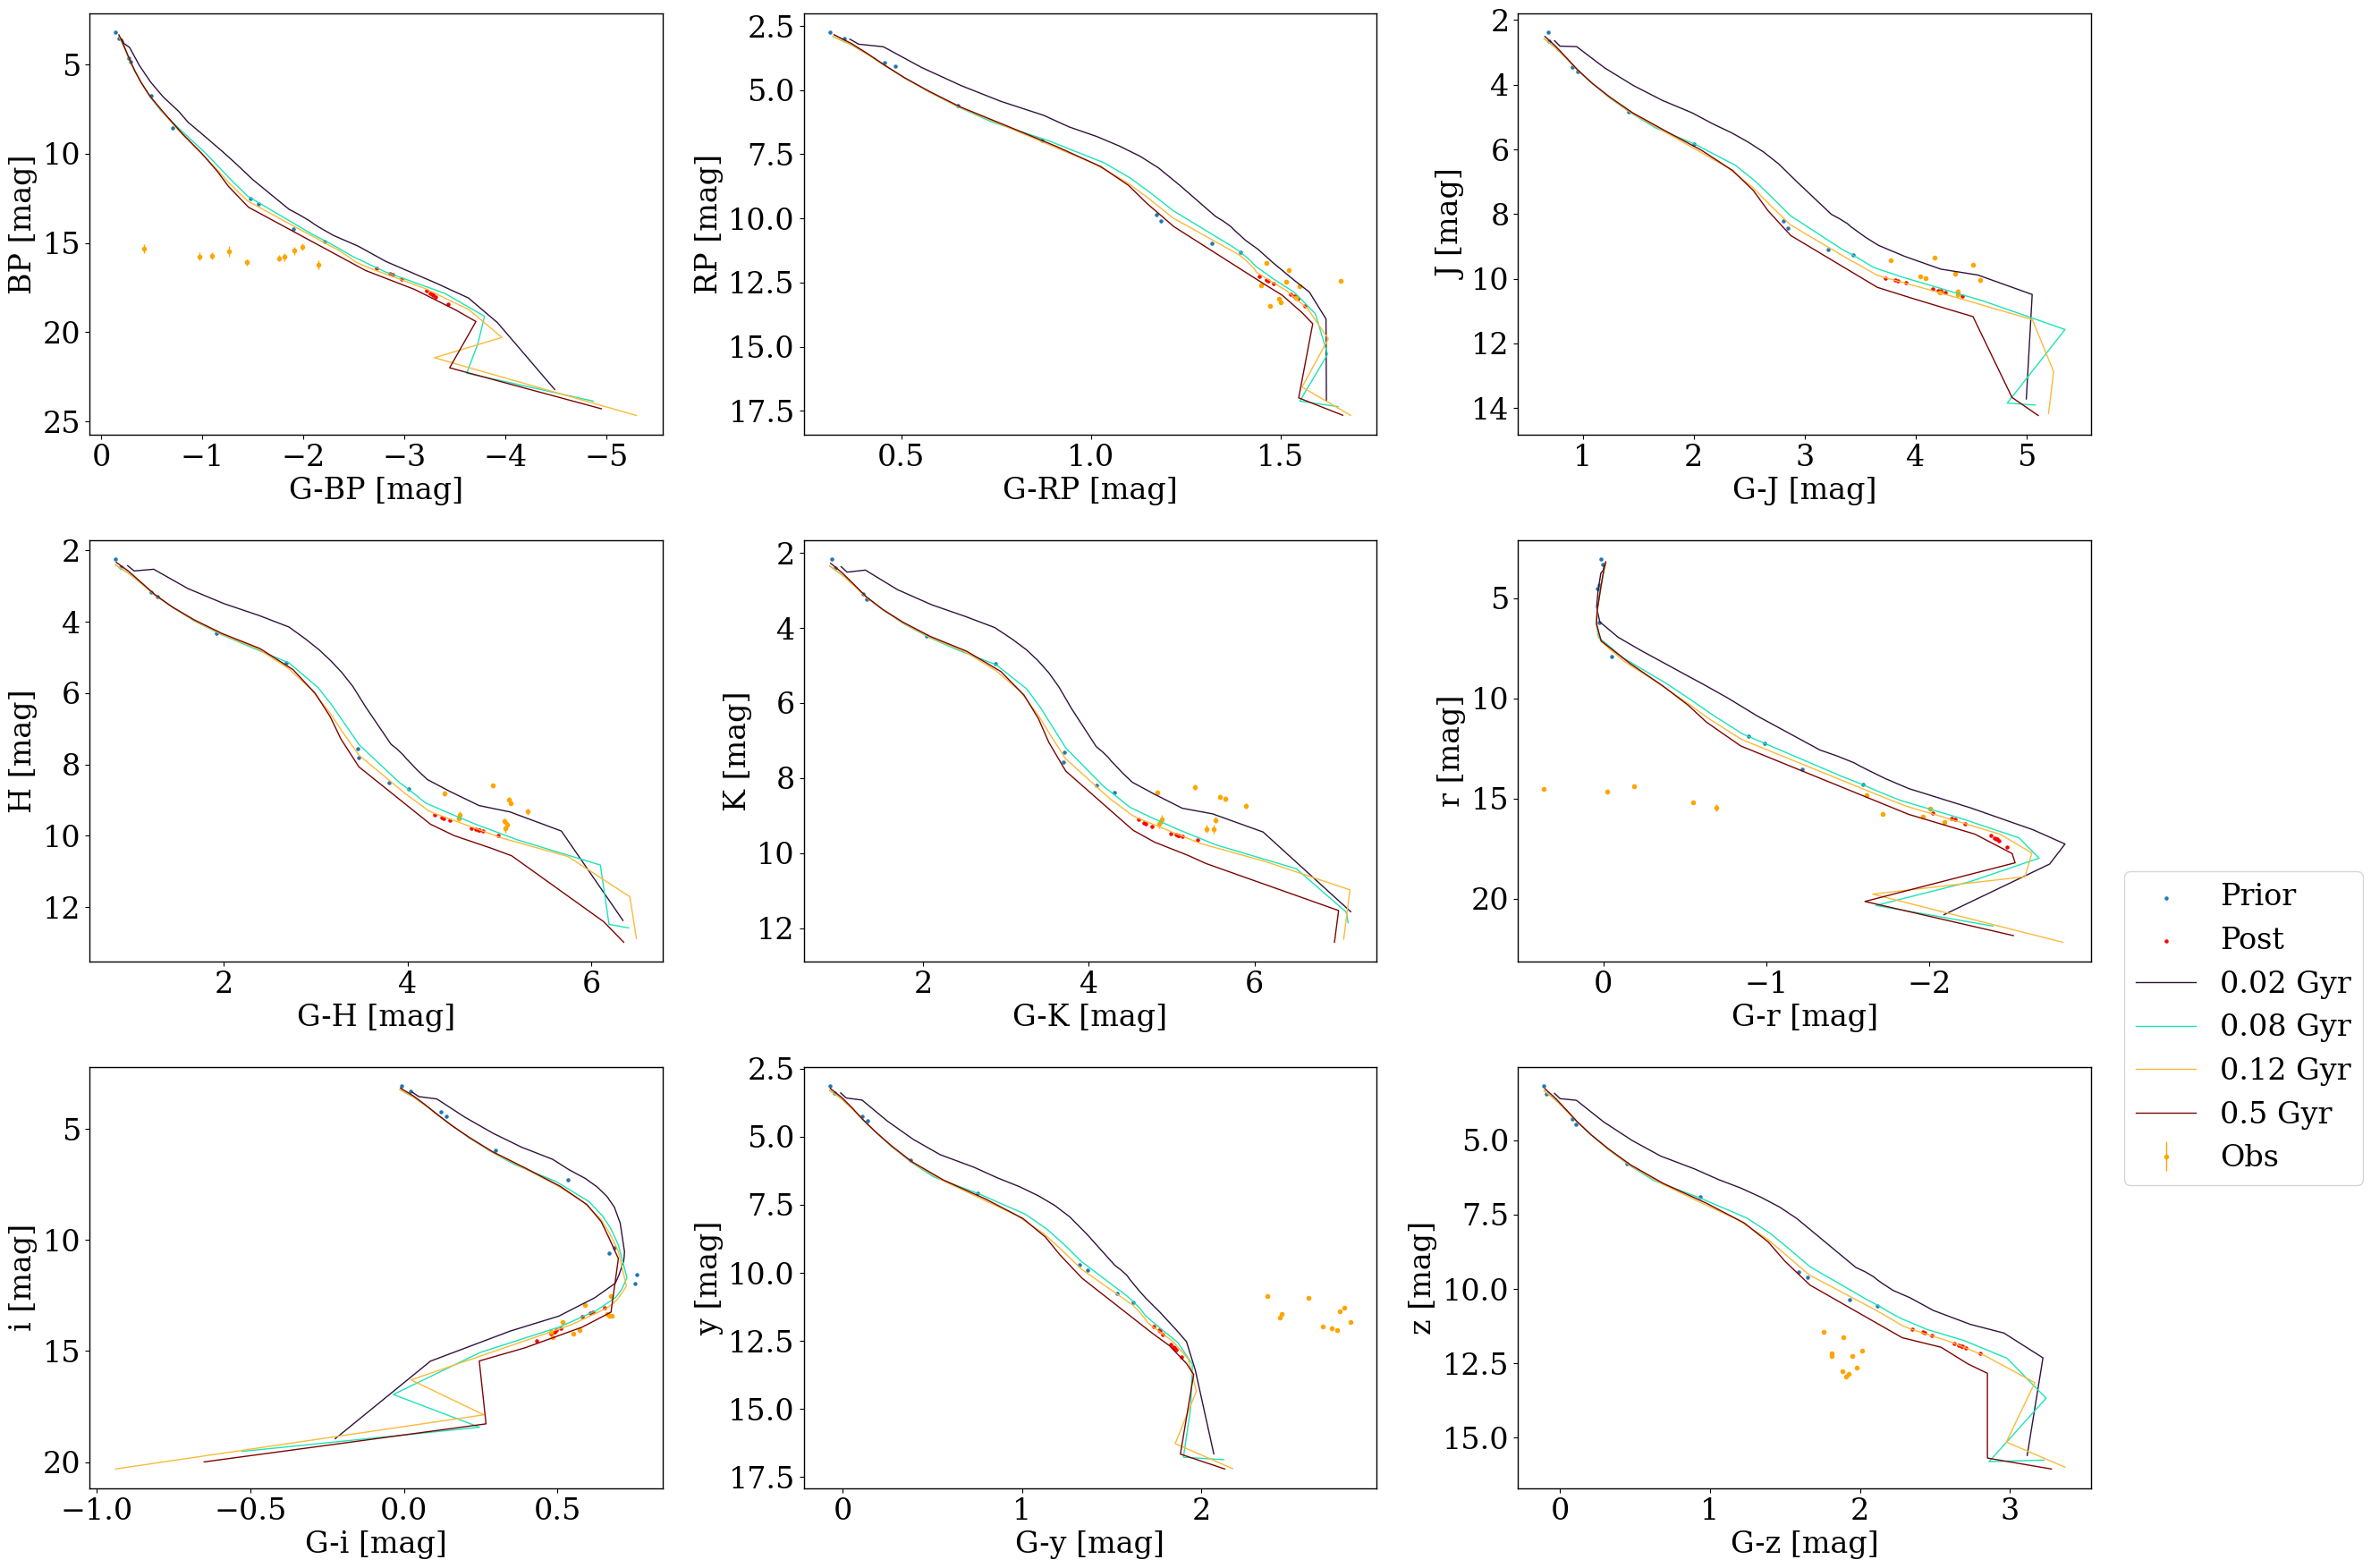

(array([[<Axes: xlabel='G-BP [mag]', ylabel='BP [mag]'>,
         <Axes: xlabel='G-RP [mag]', ylabel='RP [mag]'>,
         <Axes: xlabel='G-J [mag]', ylabel='J [mag]'>],
        [<Axes: xlabel='G-H [mag]', ylabel='H [mag]'>,
         <Axes: xlabel='G-K [mag]', ylabel='K [mag]'>,
         <Axes: xlabel='G-r [mag]', ylabel='r [mag]'>],
        [<Axes: xlabel='G-i [mag]', ylabel='i [mag]'>,
         <Axes: xlabel='G-y [mag]', ylabel='y [mag]'>,
         <Axes: xlabel='G-z [mag]', ylabel='z [mag]'>]], dtype=object),
 <Axes: xlabel='G-J [mag]', ylabel='A(Li) [dex]'>)

In [24]:
import bmp
from bmp import BayesianModelPlots

data_file = 'test_ALi_low_clean_only_good.csv'
file = 'output_test_UCDs_low_clean_only_good_uninf.nc'
path_data = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/test_ALi_low_clean_only_good.csv'
path_models = '/pcdisk/dalen/lgonzalez/OneDrive/Escritorio/CAB_INTA-CSIC/01-Doctorado/013-Jupyter/0134-biosc_env/data/BT-Settl_all_Myr_Gaia+2MASS+PanSTARRS.csv'
L = 10
priors = {
    'Age [Myr]': {'dist': 'uniform', 'lower': 60, 'upper': 150},
    'Distance [pc]': {'dist': 'normal', 'mu': 135, 'sigma': 20}
}
ages = [0.02, 0.08, 0.12, 0.5]
colormap = 'turbo'
plot_type = 'all'

bayesian_plots = BayesianModelPlots(data_file, priors, file, path_data, path_models, L, ages, colormap)
bayesian_plots.process_idata(plot_type=plot_type)